Based on the precision recall scores we will take the bessed preproprossing/modeling combination and perform variable reduction to see if we can improve scores.

Preprocessing Method: MinMaxScaler

Imbalanced Data Method: SMOTE

Model: Random Forest

Variables to keep: TotalCharges, tenure, MonthlyCharges

This means we will drop all categorical data so there is no need for dummy variables.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import model_selection
from imblearn.under_sampling import RandomUnderSampler
import scipy.stats as stats

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import model_selection
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from imblearn.over_sampling import SMOTE

In [46]:
file = '/Users/tshields/Documents/GitHub/Churn/Data/churn_data_cleaned.csv'

In [47]:
df = pd.read_csv(file, index_col=0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Drop all columns except the target variable, TotalCharges, tenure, and MonthlyCharges

In [48]:
X = df._get_numeric_data()
X.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7032 non-null   int64  
 1   MonthlyCharges  7032 non-null   float64
 2   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 219.8 KB


## Separating numerical data and fitting StandardScaler

In [50]:
num = df[['tenure', 'MonthlyCharges', 'TotalCharges']] 
num = StandardScaler().fit_transform(num)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Scaling Numeric Values using MinMaxScaler

In [61]:
## Separating numerical data and fitting StandardScaler

num = df[['tenure', 'MonthlyCharges', 'TotalCharges']] 
num = StandardScaler().fit_transform(num)
df.head()

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


# Encoding Target Variable

In [62]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
y = df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

## Splitting the data

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

## Fit predictor and target variable using SMOTE



In [64]:
smote = SMOTE(random_state = 0)

X_smote, y_smote = smote.fit_resample(X_train, y_train)


### Performing a RandomSearch on the RandomForestClassifier

In [65]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_smote, y_smote)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   13.6s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=42, verbose=2)

In [67]:
rf_random.best_params_
rf_random.best_score_
rf_random.best_estimator_


RandomForestClassifier(max_depth=50, n_estimators=230)

In [68]:
forestOpt = RandomForestClassifier(max_depth=50, n_estimators=230)
                                   
modelOpt = forestOpt.fit(X_smote, y_smote)
y_pred = modelOpt.predict(X_test)

In [69]:

y_pred_prob = modelOpt.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
print("\nClassification report:\n", classification_report(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82      1290
           1       0.51      0.59      0.54       468

    accuracy                           0.74      1758
   macro avg       0.67      0.69      0.68      1758
weighted avg       0.75      0.74      0.74      1758



In [70]:
def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1
    return precision, recall

# Test function

calc_precision_recall(y_test, y_pred)    

(0.5064220183486239, 0.5897435897435898)

In [71]:
# Fit and predict test class probabilities
lr = LogisticRegression(max_iter=10000, penalty='none')
lr.fit(X_train, y_train)
y_test_probs = lr.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
precision_scores = []
recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0, 1, num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = calc_precision_recall(y_test, y_test_preds)
        
    precision_scores.append(precision)
    recall_scores.append(recall)

In [72]:
# LOGISTIC REGRESSION (L2 REGULARIZATION)

# Fit and predict test class probabilities
lr_l2 = LogisticRegression(max_iter=1000, penalty='l2')
lr_l2.fit(X_train, y_train)
y_test_probs = lr_l2.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
l2_precision_scores = []
l2_recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0,1,num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = calc_precision_recall(y_test, y_test_preds)
        
    l2_precision_scores.append(precision)
    l2_recall_scores.append(recall)

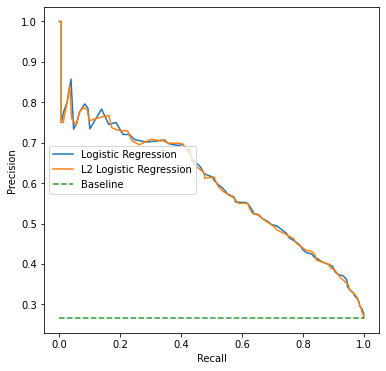

In [73]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall_scores, precision_scores, label='Logistic Regression')
ax.plot(l2_recall_scores, l2_precision_scores, label='L2 Logistic Regression')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

In [74]:
from sklearn.metrics import auc, average_precision_score

print(f'LR (No reg.) AUC-PR: {round(auc(recall_scores, precision_scores),2)}')
print(f'LR(L2 reg.) AUC-PR: {round(auc(l2_recall_scores, l2_precision_scores),2)}')
print('\n')
print(f'LR (No reg.) Avg. Prec.: {round(average_precision_score(y_test, lr.predict_proba(X_test)[:,1]),2)}')
print(f'LR (L2 reg.) Avg. Prec.: {round(average_precision_score(y_test, lr_l2.predict_proba(X_test)[:,1]),2)}')


LR (No reg.) AUC-PR: 0.59
LR(L2 reg.) AUC-PR: 0.59


LR (No reg.) Avg. Prec.: 0.6
LR (L2 reg.) Avg. Prec.: 0.6


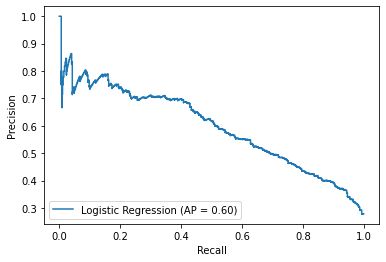

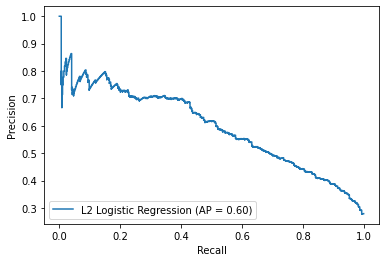

[CV] n_estimators=180, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=180, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.2s
[CV] n_estimators=130, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=130, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   0.8s
[CV] n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   0.9s
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   1.5s
[CV] n_estimators=180,

[CV] n_estimators=180, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=180, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=   0.9s
[CV] n_estimators=130, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=130, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False, total=   1.0s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False, total=   1.7s
[CV] n_estimators=180, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=180, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.4s
[CV] n_estimators=130, min_s

[CV] n_estimators=180, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=180, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.3s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False, total=   1.7s
[CV] n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   1.6s
[CV] n_estimators=130, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=130, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.9s
[CV] n_estimators=180,

[CV] n_estimators=180, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=180, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, total=   1.1s
[CV] n_estimators=130, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=130, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   0.9s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False, total=   1.6s
[CV] n_estimators=180, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=180, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, total=   0.9s
[CV] n_estimators=130, m

In [75]:
#Use sklearn to plot precision-recall curves

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(lr, X_test, y_test, name = 'Logistic Regression')
plot_precision_recall_curve(lr_l2, X_test, y_test, name = 'L2 Logistic Regression');